<a href="https://colab.research.google.com/github/MathSGarcia/PCG1NO---ACO/blob/main/Colonia_de_Formigas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install osmnx ipyleaflet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.8 MB/s eta 0:00:00


In [2]:
# Importa a biblioteca OSMnx para trabalhar com dados de redes urbanas baseadas em OpenStreetMap
import osmnx as ox

# Importa a biblioteca NetworkX para análise de redes complexas
import networkx as nx

# Importa a biblioteca pandas para manipulação de dados em formato de tabela (dataframes)
import pandas as pd

# Importa a biblioteca NumPy para operações matemáticas eficientes em arrays
import numpy as np

# Importa o módulo random para geração de números aleatórios
import random

# Importa a biblioteca Matplotlib para visualização de gráficos e plots
import matplotlib.pyplot as plt

# Importa classes específicas do ipyleaflet para criar mapas interativos
from ipyleaflet import Map, Marker, Polyline, Icon, WidgetControl

In [3]:
# Define o local (place) como "José Menino, Santos, Brazil"
place = "José Menino, Santos, Brazil"

# Define uma custom filter (cf) para selecionar tipos específicos de vias de tráfego
cf = '["highway"~"motorway|trunk|primary|secondary|tertiary|residential"]'

In [4]:
# Cria um grafo de rede de vias de tráfego usando OSMnx, considerando apenas vias para veículos motorizados
highways = ox.graph_from_place(place, network_type="drive", custom_filter=cf)

# Obtém o número de nós no grafo de vias
highways.number_of_nodes()

110

In [5]:
# Mapeia os nomes dos nós para índices numéricos
mapeamento_nomes = {node: f"{idx}" for idx, node in enumerate(sorted(highways.nodes()))}
highways = nx.relabel_nodes(highways, mapeamento_nomes)

In [6]:
# Inicializa variáveis e adiciona números de arestas ao grafo
aresta_numero = 1
distancias = {}

# Itera sobre as arestas do grafo e calcula as distâncias em metros
for u, v, key, data in highways.edges(keys=True, data=True):
    distancia_metros = int(data["length"])  # Converte para inteiro
    distancias[(u, v, key)] = distancia_metros
    highways[u][v][key]["nome_aresta"] = aresta_numero
    aresta_numero += 1

In [7]:
# Cria um dataframe com as distâncias entre as arestas
df = pd.DataFrame(list(distancias.items()), columns=["Aresta", "Distancia (m)"])


In [8]:
df

,Aresta,Distancia (m)
0,"(0, 104, 0)",34
1,"(0, 12, 0)",141
2,"(1, 65, 0)",19
3,"(1, 27, 0)",55
4,"(2, 53, 0)",68
...,...,...
173,"(106, 105, 0)",108
174,"(107, 108, 0)",40
175,"(108, 107, 0)",40
176,"(109, 29, 0)",14


In [9]:
# Cria uma lista de nós únicos no grafo
vertices_unicos = sorted(set([v for aresta in df["Aresta"] for v in aresta[:2]]))

# Inicializa um dataframe final para armazenar as distâncias entre os nós
df_final = pd.DataFrame(index=vertices_unicos, columns=vertices_unicos)

In [10]:
# Preenche o dataframe final com as distâncias entre os nós
for aresta, distancia in zip(df["Aresta"], df["Distancia (m)"]):
    df_final.at[aresta[0], aresta[1]] = distancia
    df_final.at[aresta[1], aresta[0]] = distancia

In [11]:
# Preenche valores NaN com infinito e atribui zero para distâncias entre um nó e ele mesmo
df_final = df_final.fillna(np.inf)
for col in df_final.columns:
    df_final.at[col, col] = 0

<ipython-input-11-9e7e70f2020b>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.fillna(np.inf)


In [12]:
# Reorganiza o dataframe final com índices e colunas ordenadas numericamente
df_final = df_final.reindex(sorted(df_final.columns, key=lambda x: int(x)), axis=0)
df_final = df_final.reindex(sorted(df_final.columns, key=lambda x: int(x)), axis=1)

In [13]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,34.0,inf,inf,inf,inf,inf
1,inf,0.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,inf,inf,0.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,15.0,inf,inf,inf
3,inf,inf,inf,0.0,inf,inf,inf,inf,inf,229.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,inf,inf,inf,inf,0.0,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,0.0,108.0,inf,inf,inf
106,inf,inf,15.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,108.0,0.0,inf,inf,inf
107,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,0.0,40.0,inf
108,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,40.0,0.0,inf


In [14]:
# Cria um grafo não direcionado a partir do grafo de vias de tráfego
grafo_nao_direcionado = nx.Graph(highways)


In [15]:
# Mapeia os números de vértices para os nós do grafo não direcionado
numeros_de_vertice = {v: f"{i}" for i, v in enumerate(grafo_nao_direcionado.nodes(), start=0)}

In [16]:
# Cria um layout para posicionar os vértices no plano
layout = {v: (grafo_nao_direcionado.nodes[v]["x"], grafo_nao_direcionado.nodes[v]["y"]) for v in grafo_nao_direcionado.nodes()}


In [17]:
#cria um dicionario de nós com as informações de coordenas geograficas de cada nó
coords = {node: (highways.nodes[node]['y'], highways.nodes[node]['x']) for node in highways.nodes}

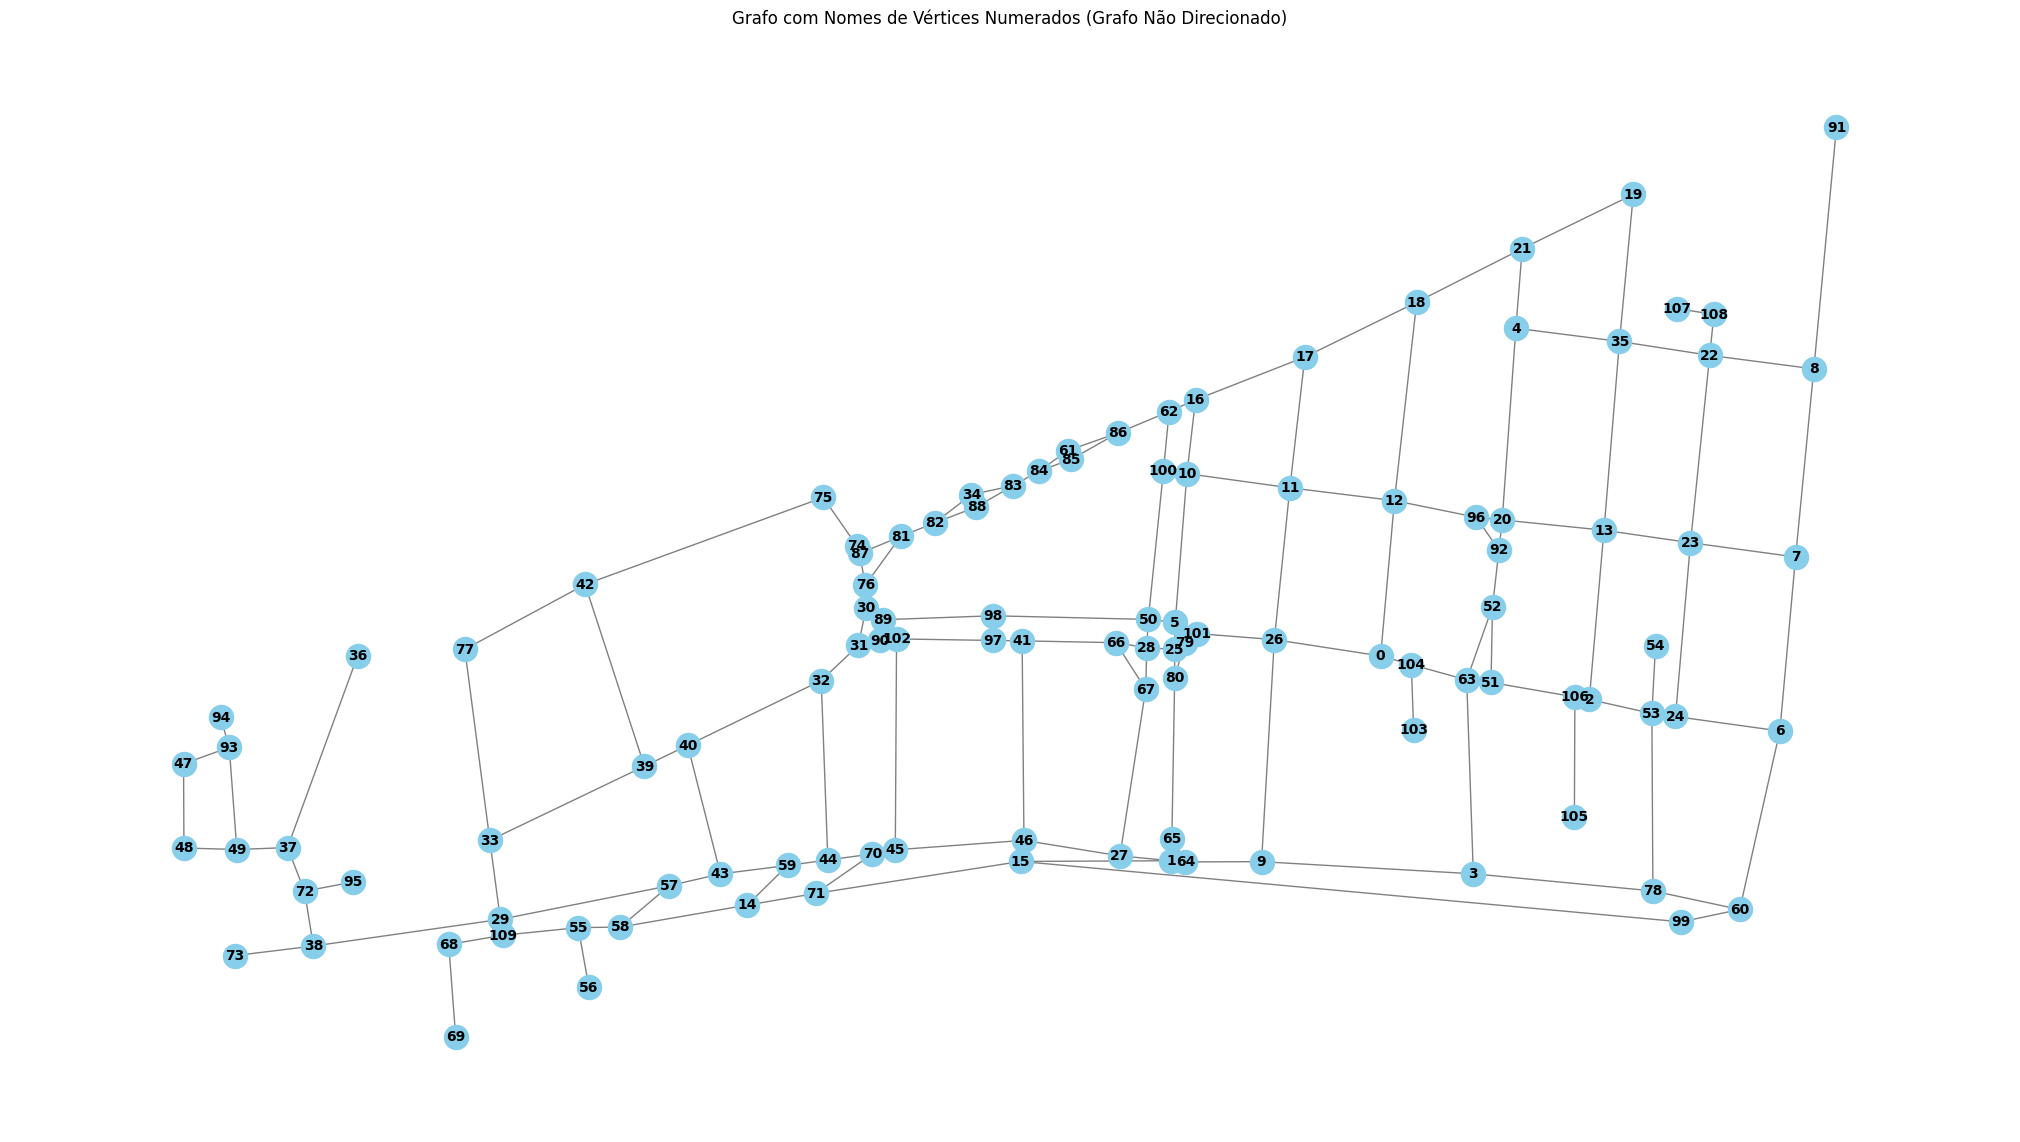

In [18]:
# Desenha o grafo não direcionado com rótulos e estilização
plt.figure(figsize=(20, 11))

nx.draw(
    grafo_nao_direcionado,
    pos=layout,
    with_labels=True,
    labels=numeros_de_vertice,
    node_size=300,    node_color="skyblue",
    font_size=10,    font_weight="bold",
    edge_color="gray"
)

# Adiciona título ao gráfico
plt.title("Grafo com Nomes de Vértices Numerados (Grafo Não Direcionado)")

# Desativa os eixos
plt.axis("off")

# Exibe o gráfico
plt.show()

In [19]:
# Função para otimização por colônia de formigas
def ant_colony_optimization(start_node, nos_especificos, num_iterations, pheromones, alpha, beta, rho, Q, num_ants, melhores_caminhos, distance_matrix):
    melhor_caminho = None
    melhor_distancia = np.inf

    for iteracao in range(num_iterations):
        caminhos_formiga = []

        # Gera caminhos para cada formiga
        for formiga in range(num_ants):
            caminho = gerar_caminho_formiga(start_node, nos_especificos, distance_matrix, pheromones, alpha, beta)
            distancia = calcular_distancia_do_caminho(caminho, distance_matrix)
            caminhos_formiga.append((caminho, distancia))

        # Encontra o melhor caminho entre os caminhos das formigas
        for caminho, distancia in caminhos_formiga:
            if distancia < melhor_distancia:
                melhor_caminho = caminho
                melhor_distancia = distancia
        # Armazena os melhores caminhos para iterações específicas
        melhores_caminhos[iteracao + 1] = melhor_caminho.copy()
        # Atualiza os feromonios com base nos melhores caminhos
        atualizar_feromonios(caminhos_formiga, pheromones, rho, Q)

        print(f'Iteração {iteracao}: {melhor_distancia}')

    return melhor_caminho, melhor_distancia

# Função para gerar caminho de formiga
def gerar_caminho_formiga(no_inicial, nos_especificos, distance_matrix, pheromones, alpha, beta):
    caminho = [no_inicial]
    no_atual = no_inicial

    while set(nos_especificos) - set(caminho):
        proximo_no = selecionar_proximo_no(no_atual, nos_especificos, distance_matrix, caminho, pheromones, alpha, beta)
        if proximo_no == -1:
            # Nenhum próximo nó válido encontrado
            break
        caminho.append(proximo_no)
        no_atual = proximo_no

    return caminho

# Função para selecionar o próximo nó para a formiga
def selecionar_proximo_no(no_atual, nos_especificos, distance_matrix, caminho_atual, pheromones, alpha, beta):
    grau_no_atual = np.sum(distance_matrix[no_atual] != 0)
    # print('teste')
    valores_feromonio = pheromones[no_atual] ** alpha

    # Distância inversa, dando peso zero a distâncias zero para evitar divisão por zero
    valores_distancia = 1 / np.where((distance_matrix[no_atual] != 0) & (distance_matrix[no_atual] != np.inf), distance_matrix[no_atual], 1) ** beta
    # print('teste2')
    # Evitar que a formiga retorne para o nó inicial antes de atingir os nós específicos
    valores_distancia[no_atual] = 0

    # Exclui os nós que já foram visitados
    for no in caminho_atual:
        valores_distancia[no] = 0

    # print('teste for')
    # Exclui arestas com valores np.inf e 0
    arestas_validas = np.where((distance_matrix[no_atual] != 0) & (distance_matrix[no_atual] != np.inf))[0]
    valores_feromonio = valores_feromonio[arestas_validas]
    valores_distancia = valores_distancia[arestas_validas]

    # Adiciona uma quantidade pequena para evitar probabilidades zero
    probabilidades = valores_feromonio * valores_distancia
    probabilidades += 1e-8
    # print('teste 3')
    probabilidades /= probabilidades.sum()

    if np.isnan(probabilidades.sum()):
        return -1

    # Se o nó atual tiver grau 1, permitir retorno ao nó anterior
    if grau_no_atual == 1:
        # Verifica se o nó anterior é um nó válido para retorno
        no_anterior = caminho_atual[-2] if len(caminho_atual) >= 2 else -1
        if no_anterior != -1 and no_anterior not in caminho_atual and no_anterior not in nos_especificos:
            return no_anterior

    # Escolher aleatoriamente um ponto ponderado pelas probabilidades
    escolha = np.random.choice(arestas_validas, p=probabilidades)
    # print('teste1221')
    return escolha


# Função para calcular a distância do caminho
def calcular_distancia_do_caminho(caminho, distance_matrix):
    distancia = 0
    for i in range(len(caminho) - 1):
        distancia += distance_matrix[caminho[i], caminho[i + 1]]
    return distancia

# Função para atualizar feromonios
def atualizar_feromonios(caminhos_formiga, pheromones, rho, Q):
    # Evaporação dos feromonios
    pheromones *= (1 - rho)

    # Deposita feromonios nos caminhos das formigas
    for caminho, distancia in caminhos_formiga:
        for i in range(len(caminho) - 1):
            pheromones[caminho[i], caminho[i + 1]] += Q / distancia


# Função para penalizar uma formiga que persiste no mesmo caminho
def penalizar_formiga(pheromones, caminho):
    # Reduz os feromonios ao longo do caminho penalizado
    for i in range(len(caminho) - 1):
        pheromones[caminho[i], caminho[i + 1]] *= 0.8  # Ajusta o fator de penalização

In [20]:
#parametros usados no algoritimo de colonia de formigas

num_nodes = len(df_final) #numero de nós
alpha = 1.0  # influencia do feromonio
beta = 2.2  # distanciad a influencia
rho = 0.7 # taxa de evaporação do feromonio
Q = 100 # deposito de feromonios
pheromones = np.random.rand(num_nodes, num_nodes) #feromonios iniciais

melhores_caminhos = {} #dicionario criado para armazenar todos os melhores caminhos de cada iteração
melhores_caminhos_volta = {}
start_node = 28 #nó inicial (centro de distribuição)
end_node = [start_node] #nó final (no nosso caso esse nó está como o inicial para indicar que ao fim do caminho de ida o nó final do caminho de volta é o nó inicial)
nos_especificos = [30, 56, 103, 86, 69]  # Nós que precisam ser visitados durante o caminho
num_iterations = 100 #numero de iterações
num_ants = (len(nos_especificos) + 1) * 3 #numero de formigas (numero de entregas + centro de distribuição vezes 3)

In [21]:
#primeira chamada da função do algoritimo de colonia de formigas, que representa o caminho de ida
melhor_caminho, melhor_distancia = ant_colony_optimization(start_node, nos_especificos, num_iterations, pheromones, alpha, beta, rho, Q, num_ants, melhores_caminhos, df_final.values)
#segunda chamada, representando o caminho de volta, usamos o nó de parada do melhor caminho da ultima execução para indicar onde começaremos o caminho de volta
pheromones = np.random.rand(num_nodes, num_nodes)
melhor_caminho_volta, melhor_distancia_volta = ant_colony_optimization(melhor_caminho[-1], end_node, num_iterations, pheromones, alpha, beta, rho, Q, num_ants, melhores_caminhos_volta, df_final.values)

print("Melhor Caminho:", melhor_caminho + melhor_caminho_volta[1:])
print("Melhor Distância:", melhor_distancia + melhor_distancia_volta)

Iteração 0: 19489.0
Iteração 1: 17246.0
Iteração 2: 16188.0
Iteração 3: 12802.0
Iteração 4: 12802.0
Iteração 5: 12802.0
Iteração 6: 9015.0
Iteração 7: 9015.0
Iteração 8: 8097.0
Iteração 9: 4463.0
Iteração 10: 4463.0
Iteração 11: 4463.0
Iteração 12: 4463.0
Iteração 13: 4463.0
Iteração 14: 4463.0
Iteração 15: 4463.0
Iteração 16: 4463.0
Iteração 17: 4463.0
Iteração 18: 3686.0
Iteração 19: 3686.0
Iteração 20: 3686.0
Iteração 21: 3686.0
Iteração 22: 3686.0
Iteração 23: 3686.0
Iteração 24: 3686.0
Iteração 25: 3686.0
Iteração 26: 3686.0
Iteração 27: 3686.0
Iteração 28: 3686.0
Iteração 29: 3686.0
Iteração 30: 3686.0
Iteração 31: 3686.0
Iteração 32: 3686.0
Iteração 33: 3686.0
Iteração 34: 3686.0
Iteração 35: 3686.0
Iteração 36: 3686.0
Iteração 37: 3686.0
Iteração 38: 3686.0
Iteração 39: 3686.0
Iteração 40: 3686.0
Iteração 41: 3686.0
Iteração 42: 3686.0
Iteração 43: 3686.0
Iteração 44: 3686.0
Iteração 45: 3686.0
Iteração 46: 3686.0
Iteração 47: 3686.0
Iteração 48: 3686.0
Iteração 49: 3686.0
Iter

In [22]:
#tranforma os nós em string  para que o valor coincida com o dicionario coords
primeiro_caminho_valido = [f"{node}" for node in melhores_caminhos[1] if f"{node}" in highways.nodes]
primeiro_caminho_valido_volta = [f"{node}" for node in melhores_caminhos_volta[1] if f"{node}" in highways.nodes][1:]

In [23]:
#cria um mapa centralizado na coordenada do nó inicial
m = Map(center=(coords[primeiro_caminho_valido[0]]), zoom=15)
#cria um marcador para todos os nós presentes no caminho
#os nós de entrega ficam em destaque no mapa, uma vez que os nós de caminho são transformardos em opacos pela função
for node in primeiro_caminho_valido:
    if int(node) in nos_especificos or int(node) == start_node:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=1)
    else:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=0.3)

    m.add_layer(marker)
#cria uma linha que passa por cada ponto para sinalizar o caminho
#caminho de cor vermelha é a ida
path = Polyline(locations=[coords[node] for node in primeiro_caminho_valido], color="red", fill=False)
#adiciona o caminho para o mapa
m.add_layer(path)

#caminho de cor azul é a volta
path2 = Polyline(locations=[coords[node] for node in primeiro_caminho_valido_volta], color="blue", fill=False)
m.add_layer(path2)
#mostra o mapa e as suas camadas extras(marcadores e caminhos)
m

Map(center=[-23.9661447, -46.3458156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

In [24]:
#tranforma os nós em string  para que o valor coincida com o dicionario coords
melhor_caminho_valido = [f"{node}" for node in melhores_caminhos[25] if f"{node}" in highways.nodes]
melhor_caminho_valido_volta = [f"{node}" for node in melhores_caminhos_volta[25] if f"{node}" in highways.nodes][1:]

In [25]:
#cria um mapa centralizado na coordenada do nó inicial
m = Map(center=(coords[melhor_caminho_valido[0]]), zoom=15)
#cria um marcador para todos os nós presentes no caminho
#os nós de entrega ficam em destaque no mapa, uma vez que os nós de caminho são transformardos em opacos pela função
for node in melhor_caminho_valido:
    if int(node) in nos_especificos or int(node) == start_node:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=1)
    else:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=0.3)

    m.add_layer(marker)
#cria uma linha que passa por cada ponto para sinalizar o caminho
#caminho de cor vermelha é a ida
path = Polyline(locations=[coords[node] for node in melhor_caminho_valido], color="red", fill=False)
#adiciona o caminho para o mapa
m.add_layer(path)

#caminho de cor azul é a volta
path2 = Polyline(locations=[coords[node] for node in melhor_caminho_valido_volta], color="blue", fill=False)
m.add_layer(path2)
#mostra o mapa e as suas camadas extras(marcadores e caminhos)
m

Map(center=[-23.9661447, -46.3458156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

In [26]:
#tranforma os nós em string  para que o valor coincida com o dicionario coords
melhor_caminho_valido = [f"{node}" for node in melhores_caminhos[50] if f"{node}" in highways.nodes]
melhor_caminho_valido_volta = [f"{node}" for node in melhores_caminhos_volta[50] if f"{node}" in highways.nodes][1:]

In [27]:
#cria um mapa centralizado na coordenada do nó inicial
m = Map(center=(coords[melhor_caminho_valido[0]]), zoom=15)
#cria um marcador para todos os nós presentes no caminho
#os nós de entrega ficam em destaque no mapa, uma vez que os nós de caminho são transformardos em opacos pela função
for node in melhor_caminho_valido:
    if int(node) in nos_especificos or int(node) == start_node:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=1)
    else:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=0.3)

    m.add_layer(marker)
#cria uma linha que passa por cada ponto para sinalizar o caminho
#caminho de cor vermelha é a ida
path = Polyline(locations=[coords[node] for node in melhor_caminho_valido], color="red", fill=False)
#adiciona o caminho para o mapa
m.add_layer(path)

#caminho de cor azul é a volta
path2 = Polyline(locations=[coords[node] for node in melhor_caminho_valido_volta], color="blue", fill=False)
m.add_layer(path2)
#mostra o mapa e as suas camadas extras(marcadores e caminhos)
m

Map(center=[-23.9661447, -46.3458156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

In [28]:
#tranforma os nós em string  para que o valor coincida com o dicionario coords
melhor_caminho_valido = [f"{node}" for node in melhores_caminhos[75] if f"{node}" in highways.nodes]
melhor_caminho_valido_volta = [f"{node}" for node in melhores_caminhos_volta[75] if f"{node}" in highways.nodes][1:]

In [29]:
#cria um mapa centralizado na coordenada do nó inicial
m = Map(center=(coords[melhor_caminho_valido[0]]), zoom=15)
#cria um marcador para todos os nós presentes no caminho
#os nós de entrega ficam em destaque no mapa, uma vez que os nós de caminho são transformardos em opacos pela função
for node in melhor_caminho_valido:
    if int(node) in nos_especificos or int(node) == start_node:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=1)
    else:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=0.3)

    m.add_layer(marker)
#cria uma linha que passa por cada ponto para sinalizar o caminho
#caminho de cor vermelha é a ida
path = Polyline(locations=[coords[node] for node in melhor_caminho_valido], color="red", fill=False)
#adiciona o caminho para o mapa
m.add_layer(path)

#caminho de cor azul é a volta
path2 = Polyline(locations=[coords[node] for node in melhor_caminho_valido_volta], color="blue", fill=False)
m.add_layer(path2)
#mostra o mapa e as suas camadas extras(marcadores e caminhos)
m

Map(center=[-23.9661447, -46.3458156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

In [30]:
#tranforma os nós em string  para que o valor coincida com o dicionario coords
melhor_caminho_valido = [f"{node}" for node in melhores_caminhos[100] if f"{node}" in highways.nodes]
melhor_caminho_valido_volta = [f"{node}" for node in melhores_caminhos_volta[100] if f"{node}" in highways.nodes][1:]

In [31]:
#cria um mapa centralizado na coordenada do nó inicial
m = Map(center=(coords[melhor_caminho_valido[0]]), zoom=15)
#cria um marcador para todos os nós presentes no caminho
#os nós de entrega ficam em destaque no mapa, uma vez que os nós de caminho são transformardos em opacos pela função
for node in melhor_caminho_valido:
    if int(node) in nos_especificos or int(node) == start_node:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=1)
    else:
      marker = Marker(location=(coords[node]), title=f"{node}", opacity=0.3)

    m.add_layer(marker)
#cria uma linha que passa por cada ponto para sinalizar o caminho
#caminho de cor vermelha é a ida
path = Polyline(locations=[coords[node] for node in melhor_caminho_valido], color="red", fill=False)
#adiciona o caminho para o mapa
m.add_layer(path)

#caminho de cor azul é a volta
path2 = Polyline(locations=[coords[node] for node in melhor_caminho_valido_volta], color="blue", fill=False)
m.add_layer(path2)
#mostra o mapa e as suas camadas extras(marcadores e caminhos)
m

Map(center=[-23.9661447, -46.3458156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…